## The Purpose

Modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

### The Task

<br>1- Predict the department-wide sales for each store for the following year
<br>2- Model the effects of markdowns on holiday weeks
<br>3- Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

There are 3 datasets **Stores**, **Features** and **Sales**

### Stores

Anonymized information about the 45 stores, indicating the type and size of store

### Features

Contains additional data related to the store, department, and regional activity for the given dates.

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

### Sales

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_store = pd.read_csv("stores data-set.csv")
df_feature = pd.read_csv("Features data set.csv",parse_dates=["Date"])
df_sales = pd.read_csv("sales data-set.csv",parse_dates=["Date"])

In [3]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_store.shape

(45, 3)

In [6]:
## 45 store 

In [7]:
df_feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [8]:
df_feature.tail(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [9]:
df_sales.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [10]:
df_feature['Date'] = pd.to_datetime(df_feature['Date'])
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [15]:
df_sales[0:5].Date

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

In [17]:
df_feature[0:5].Date

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

### Merge the data 

In [18]:
df = pd.merge(df_sales,df_feature,on = ["Date","Store","IsHoliday"],how = "left")

In [19]:
df = pd.merge(df,df_store,on = ["Store"],how = "left")

In [20]:
df = df.fillna(0)

In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [22]:
df['Temperature'].describe()

count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

In [24]:
df['Temperature'] = (df['Temperature'] - 32) * 5./9.

In [25]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [28]:
types_encoded , types = df['Type'].factorize()

In [30]:
df['Type'] = types_encoded

In [32]:
df.duplicated().sum()

0

In [33]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'}) 

In [36]:
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))

In [38]:
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))

In [39]:
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
## plot features 

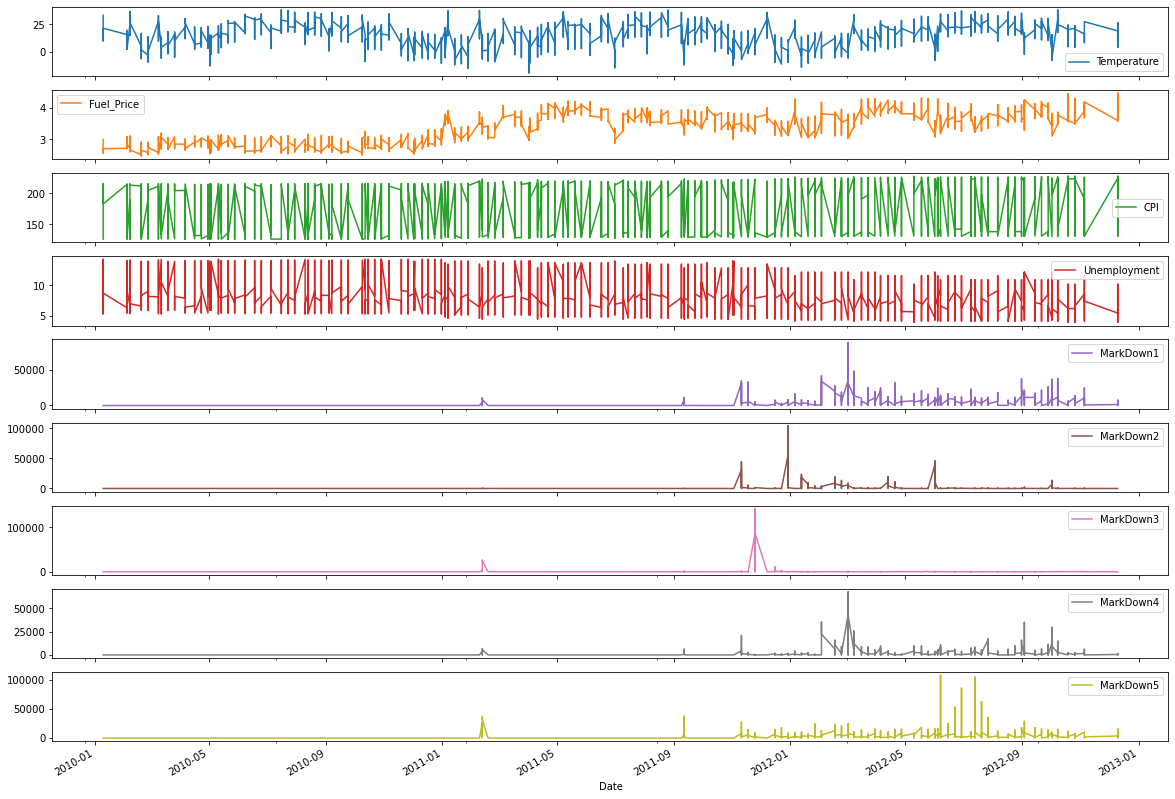

In [41]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

In [42]:
### Sum the weekely sales from every shop to get the total weekly sales volume of the retail chain

In [43]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

In [44]:
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

In [47]:
df_average_sales.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [49]:
df_average_sales.tail()

,Date,Weekly_Sales
50,2011-01-14,40673678.04
51,2011-01-21,40654648.03
47,2010-12-31,40432519.00
103,2012-01-27,39834974.67
52,2011-01-28,39599852.99


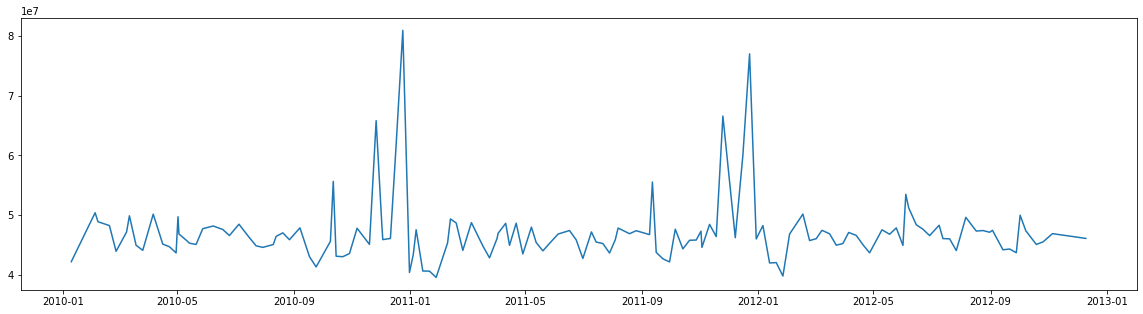

In [48]:
plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [50]:
ts = df_average_sales_week.set_index('Date')

In [62]:
df_stores_top_sales = df.groupby(by = ["Type"], as_index=False)['Weekly_Sales'].sum()

In [63]:
df_stores_top_sales.head()

,Type,Weekly_Sales
0,0,4.331015e+09
1,1,2.000701e+09
2,2,4.055035e+08


In [64]:
# Top stores of sales
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()

In [68]:
df_top_stores.sort_values('Weekly_Sales',ascending = False)[:5]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


### Forecast of the total sales 

In [71]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

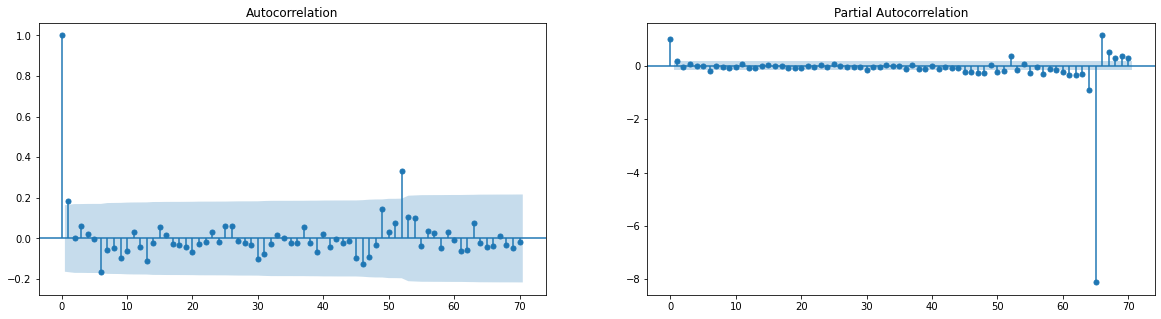

In [74]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=70, ax=axes[0])
plot_pacf(ts, lags=70, ax=axes[1])
plt.show()

### Model definition

Since the AR model implemented in the statsmodels library allows to include only consecutive seasonality terms, I implement the model manually. In this way I can use non consecutive seasonality terms like weeks 1, 6, 52 as observed from the correlation analysis.

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
def fit_ar_model(ts, orders):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_

In [78]:
def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])

[[ 0.13488444 -0.06693086  0.53027452]] [19022705.56418594]
Score factor: 0.41


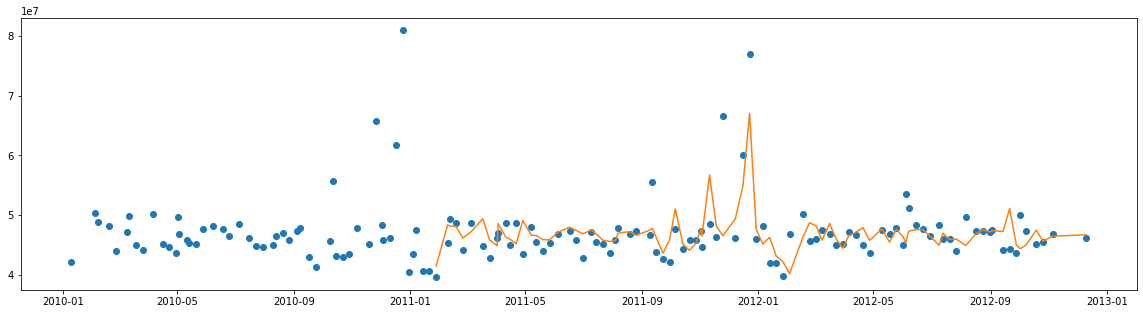

In [79]:
orders=np.array([1,6,52])
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.00, std 0.07


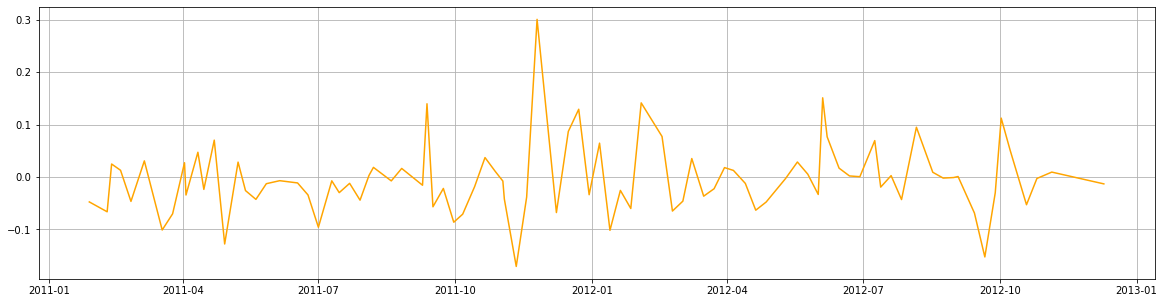

In [80]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

**The predictive model has an R^2 score factor of 0.41 (max score for perfect prediction would be 1). The residual distribution is centered in 0 with an STD of 7%.**

### Forecast of the store-wise sales volume

Develop the forecast model for the store number 34, which shows the highest sales volume.

In [81]:
df34=df.where( df['Store'] == 34)
df34=df34.dropna()
df34=df34.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df34 = df34.set_index('Date')
df34.head()

,Weekly_Sales
Date,
2010-01-10,865709.11
2010-02-04,979428.66
2010-02-07,919229.36
2010-02-19,983963.07
2010-02-26,905756.13


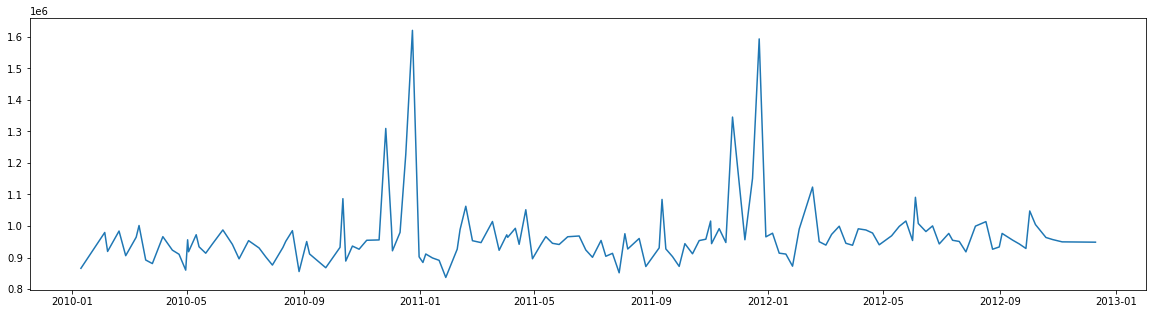

In [82]:
plt.figure(figsize=(20,5))
plt.plot(df34.index, df34.values)
plt.show()

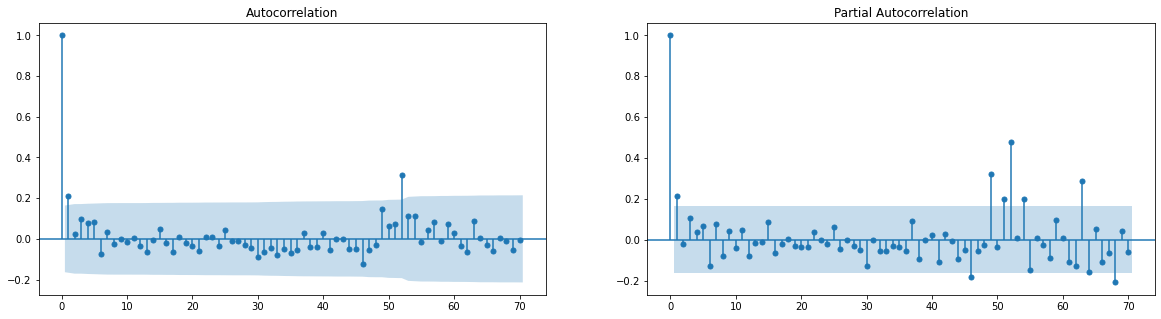

In [85]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df34.values, lags=70, alpha=0.05, ax=axes[0])
plot_pacf(df34.values, lags=70, alpha=0.05, ax=axes[1])
plt.show()

This particular store shows additional seasonalities from week 30 and 37 which will be included in the AR model.

[[ 0.21667968 -0.15086534 -0.09431279  0.06758976 -0.16889945]] [1099149.39437169]
Score factor: 0.11


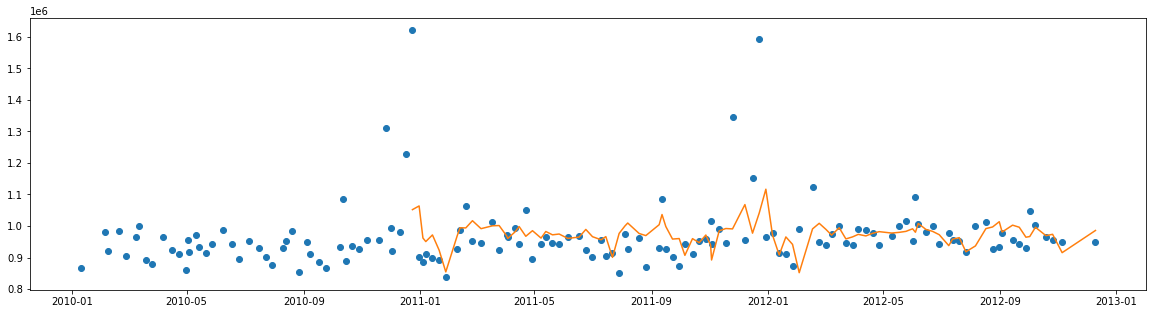

In [86]:
orders=np.array([1,6,30,37,46])
coef, intercept = fit_ar_model(df34,orders)
pred=pd.DataFrame(index=df34.index, data=predict_ar_model(df34, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df34, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.01, std 0.08


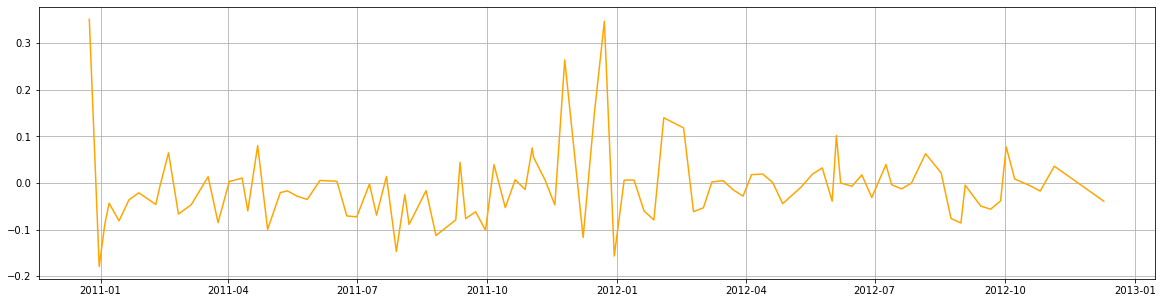

In [87]:
diff=(df34['Weekly_Sales']-pred[0])/df34['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()

**The predictive model has an R^2 score factor of 0.34 (max score for perfect prediction would be 1.). The residual distribution is centered in 0 with an STD of 8%.**

In [88]:
dfext=df.where( df['Store'] == 18)
dfext=dfext.dropna()
dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext = dfext.set_index('Date')
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-01-10,19.866667,2.717,132.756800,9.331,0.0,0.0,0.0,0.0,0.0
2010-02-04,7.572222,2.826,131.901968,9.269,0.0,0.0,0.0,0.0,0.0
2010-02-07,21.788889,2.815,132.521867,9.342,0.0,0.0,0.0,0.0,0.0
2010-02-19,-0.605556,2.747,131.637000,9.202,0.0,0.0,0.0,0.0,0.0
2010-02-26,1.900000,2.753,131.686000,9.202,0.0,0.0,0.0,0.0,0.0


In [89]:
dfext['shifted_sales'] = df34.shift(-1)
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,shifted_sales
Date,,,,,,,,,,
2010-01-10,19.866667,2.717,132.756800,9.331,0.0,0.0,0.0,0.0,0.0,979428.66
2010-02-04,7.572222,2.826,131.901968,9.269,0.0,0.0,0.0,0.0,0.0,919229.36
2010-02-07,21.788889,2.815,132.521867,9.342,0.0,0.0,0.0,0.0,0.0,983963.07
2010-02-19,-0.605556,2.747,131.637000,9.202,0.0,0.0,0.0,0.0,0.0,905756.13
2010-02-26,1.900000,2.753,131.686000,9.202,0.0,0.0,0.0,0.0,0.0,964356.74


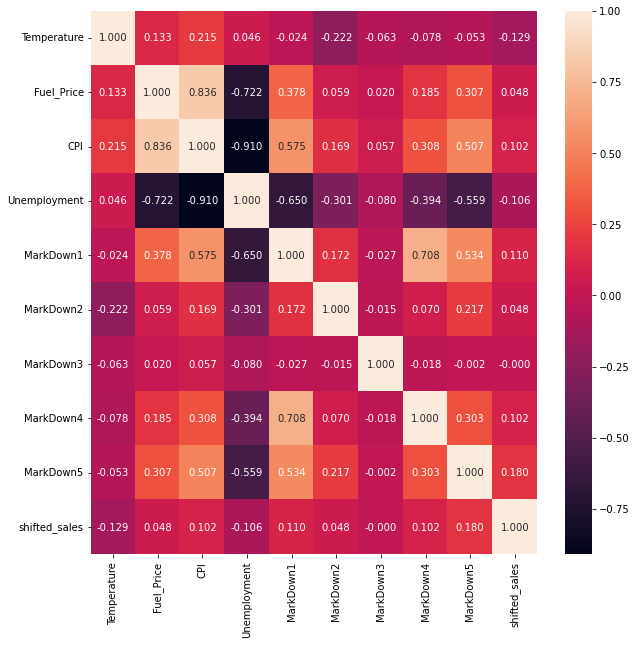

In [90]:
import seaborn as sns
corr = dfext.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

The external variables available have some correlation with the 1-day lagged sales time series. This means that they have some degree of predictive power at 1 day and can be used to improve our model. The 'MarkDown' and the 'Temperature' being the most correlated and anti-correlate variables respectively.

In [92]:
def fit_ar_model_ext(ts, orders, ext, fitter=LinearRegression()):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ext.values, axis=1)
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    fitter.fit(X[mask],Y[mask].ravel())
    
    print(fitter.coef_, fitter.intercept_)

    print('Score factor: %.2f' % fitter.score(X[mask],Y[mask]))
    
    return fitter.coef_, fitter.intercept_
    


In [93]:
def predict_ar_model_ext(ts, orders, ext, coef, intercept):

    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    X = np.append(X, ext.values, axis=1)
    
    return np.array( np.dot(X, coef.T) + intercept)

[ 2.08982134e-01 -5.39070898e-02  2.89090773e-02 -8.03177380e-02
  5.14430990e-01 -1.60915524e+04 -2.28994518e+04  3.00125259e+02
 -2.24944762e+03  2.84827229e+00 -3.07719496e+00  5.34572551e+00
 -1.83360377e+00  1.72994039e+00] 580270.4539335433
Score factor: 0.69


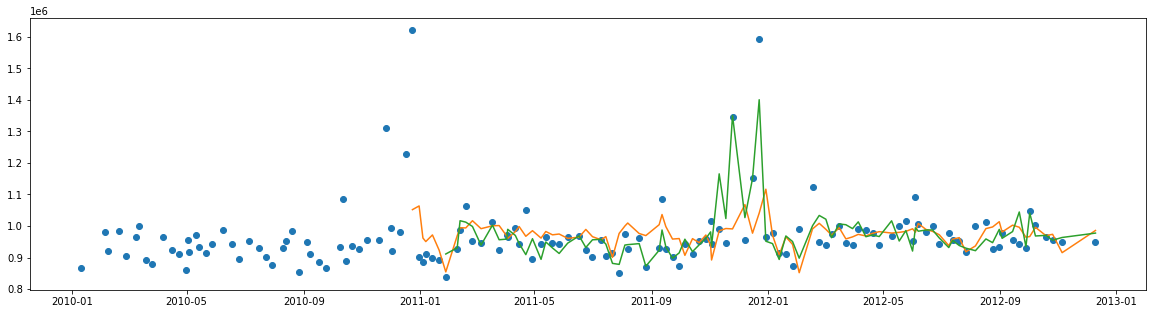

In [98]:
dfexte=dfext[['Unemployment','Fuel_Price','CPI','Temperature',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

orders=np.array([1,6,29,46,52])
coef, intercept = fit_ar_model_ext(df34,orders,dfexte)
pred_ext=pd.DataFrame(index=df34.index, data=predict_ar_model_ext(df34, orders, dfexte, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(df34, 'o')
plt.plot(pred)
plt.plot(pred_ext)
plt.show()

AR Residuals: avg -0.01, std 0.08
AR wiht Ext Residuals: avg -0.00, std 0.05


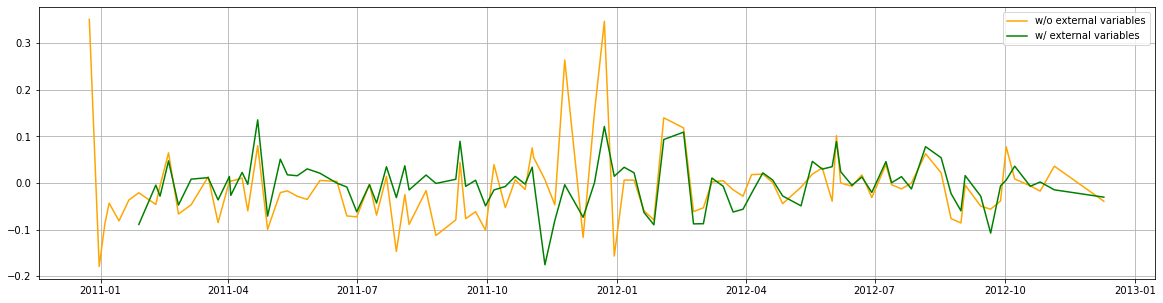

In [99]:
diff=(df34['Weekly_Sales']-pred[0])/df34['Weekly_Sales']
diff_ext=(df34['Weekly_Sales']-pred_ext[0])/df34['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR wiht Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange', label='w/o external variables')
plt.plot(diff_ext, c='green', label='w/ external variables')
plt.legend()
plt.grid()
plt.show()

The model including the external variables improve the accuracy of the prediction by more than 40% ( R^2 score: 0.58 w.r.t 0.34). The standard deviation of the residual improve by about 30% (7% w.r.t. 8%).